In [1]:
import pandas as pd
import numpy as  np

import os
os.listdir('../input')

['sample_submission.csv',
 'test.csv',
 'test2.csv',
 'test_original.csv',
 'test_sqft.csv',
 'train.csv',
 'train2.csv',
 'train_original.csv',
 'train_sqft.csv']

In [2]:
train = pd.read_csv('../input/train2.csv')
test = pd.read_csv('../input/test2.csv')

In [3]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day',
       'week', 'weekend', 'renovated_or_not', 'date_renovated_diff',
       'date_renovated_diff_log', 'date_built_diff', 'date_built_diff_log',
       'built_renovated_diff', 'log_lat', 'log_long', 'bedrooms_^2',
       'bedrooms_log', 'bedrooms_reci', 'bathrooms_^2', 'bathrooms_log',
       'bathrooms_reci', 'sqft_living_^2', 'sqft_living_log',
       'sqft_living_reci', 'sqft_lot_^2', 'sqft_lot_log', 'sqft_lot_reci',
       'floors_^2', 'floors_log', 'floors_reci', 'waterfront_^2',
       'waterfront_log', 'waterfront_reci', 'view_^2', 'view_log', 'view_reci',
       'condition_^2', 'condition_log', 'condition_reci', 'grade_^2',
       'grade_log', 'grade_reci', 'sqft_above_^2', 'sqft_above_

In [4]:
x_train = train.drop(['id', 'price','date'], axis = 1)
y_train = train['price']
x_test = test.drop(['id','date'], axis = 1)

In [5]:
import xgboost as xgb

In [20]:
xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

print('Transform DMatrix...')
dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

print('Start Cross Validation...')

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=5000, early_stopping_rounds=20,verbose_eval=50, show_stdv=False)


Transform DMatrix...
Start Cross Validation...


C:\Users\wjssm\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wjssm\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	train-rmse:650014	test-rmse:650101
[50]	train-rmse:416346	test-rmse:420790
[100]	train-rmse:276738	test-rmse:287097
[150]	train-rmse:194684	test-rmse:212082
[200]	train-rmse:147560	test-rmse:172024
[250]	train-rmse:120745	test-rmse:151558
[300]	train-rmse:105588	test-rmse:141202
[350]	train-rmse:97051.6	test-rmse:135814
[400]	train-rmse:91689.6	test-rmse:132785
[450]	train-rmse:87879.5	test-rmse:130745
[500]	train-rmse:85125.2	test-rmse:129374
[550]	train-rmse:82763.1	test-rmse:128286
[600]	train-rmse:80802	test-rmse:127566
[650]	train-rmse:79081.1	test-rmse:126950
[700]	train-rmse:77280.8	test-rmse:126293
[750]	train-rmse:75672.3	test-rmse:125747
[800]	train-rmse:74167.2	test-rmse:125276
[850]	train-rmse:72722.4	test-rmse:124845
[900]	train-rmse:71315.1	test-rmse:124494
[950]	train-rmse:70066.7	test-rmse:124208
[1000]	train-rmse:68798.2	test-rmse:123939
[1050]	train-rmse:67540.9	test-rmse:123649
[1100]	train-rmse:66362.1	test-rmse:123380
[1150]	train-rmse:65287.8	test-rmse:123158


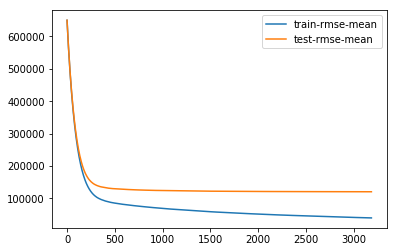

In [21]:
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot()

In [22]:
print('best num_boost_rounds = ', len(cv_output))
rounds = len(cv_output)

best num_boost_rounds =  3188


In [23]:
model = xgb.train(xgb_params, dtrain, num_boost_round = rounds)
preds = model.predict(dtest)

In [24]:
sub = test[['id']]
sub['price'] = preds
#sub.to_csv('../sub/sub_xgb_train2_190316.csv', index=False) - 110017.59854

C:\Users\wjssm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# 190318 train_sqft, test_sqft

In [2]:
train = pd.read_csv('../input/train_sqft.csv')
test = pd.read_csv('../input/test_sqft.csv')

In [3]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day',
       'week', 'weekend', 'renovated_or_not', 'date_renovated_diff',
       'date_renovated_diff_log', 'date_built_diff', 'date_built_diff_log',
       'built_renovated_diff', 'log_lat', 'log_long', 'bedrooms_^2',
       'bedrooms_log', 'bedrooms_reci', 'bathrooms_^2', 'bathrooms_log',
       'bathrooms_reci', 'sqft_living_^2', 'sqft_living_log',
       'sqft_living_reci', 'sqft_lot_^2', 'sqft_lot_log', 'sqft_lot_reci',
       'floors_^2', 'floors_log', 'floors_reci', 'waterfront_^2',
       'waterfront_log', 'waterfront_reci', 'view_^2', 'view_log', 'view_reci',
       'condition_^2', 'condition_log', 'condition_reci', 'grade_^2',
       'grade_log', 'grade_reci', 'sqft_above_^2', 'sqft_above_

In [6]:
xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

print('Transform DMatrix...')
dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

print('Start Cross Validation...')

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=5000, early_stopping_rounds=20,verbose_eval=50, show_stdv=False)


Transform DMatrix...
Start Cross Validation...


C:\Users\wjssm\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\wjssm\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	train-rmse:650013	test-rmse:650101
[50]	train-rmse:416131	test-rmse:420736
[100]	train-rmse:276498	test-rmse:287109
[150]	train-rmse:194423	test-rmse:211940
[200]	train-rmse:147204	test-rmse:171758
[250]	train-rmse:120372	test-rmse:151629
[300]	train-rmse:105161	test-rmse:141363
[350]	train-rmse:96537	test-rmse:135837
[400]	train-rmse:91165.9	test-rmse:132811
[450]	train-rmse:87411.3	test-rmse:130957
[500]	train-rmse:84548	test-rmse:129526
[550]	train-rmse:82201.1	test-rmse:128529
[600]	train-rmse:80016.5	test-rmse:127701
[650]	train-rmse:78159.3	test-rmse:127117
[700]	train-rmse:76460.9	test-rmse:126603
[750]	train-rmse:74786.9	test-rmse:126059
[800]	train-rmse:73254.5	test-rmse:125667
[850]	train-rmse:71802	test-rmse:125282
[900]	train-rmse:70302.1	test-rmse:124892
[950]	train-rmse:69001.3	test-rmse:124590
[1000]	train-rmse:67719.3	test-rmse:124349
[1050]	train-rmse:66542.5	test-rmse:124099
[1100]	train-rmse:65331.4	test-rmse:123841
[1150]	train-rmse:64267.9	test-rmse:123631
[120

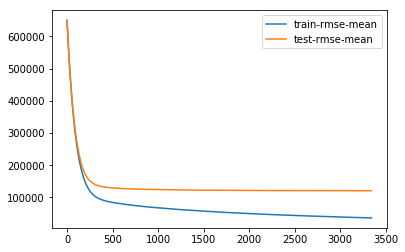

In [8]:
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot()

In [9]:
print('best num_boost_rounds = ', len(cv_output))
rounds = len(cv_output)

best num_boost_rounds =  3343


In [10]:
model = xgb.train(xgb_params, dtrain, num_boost_round = rounds)
preds = model.predict(dtest)
sub = pd.DataFrame({'id':test.id, 'price' : preds} )

In [14]:
#sub.to_csv('../sub/sub_xgb_train_sqcf_190318.csv', index=False) - 110590.43827